<a href="https://colab.research.google.com/github/Mateus-cpa/Portfolio/blob/main/Projetos%20EDA%20-%20diamante%2C%20motor%20de%20carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 15 - exercícios** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

## **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

## **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

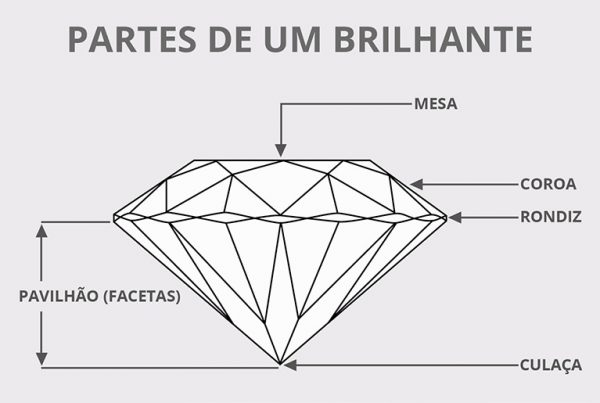

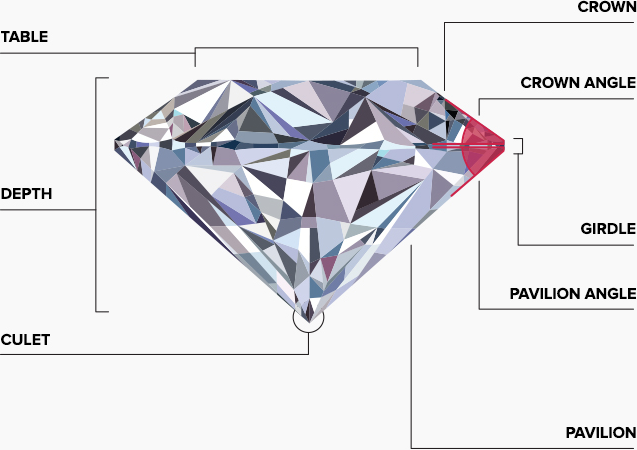
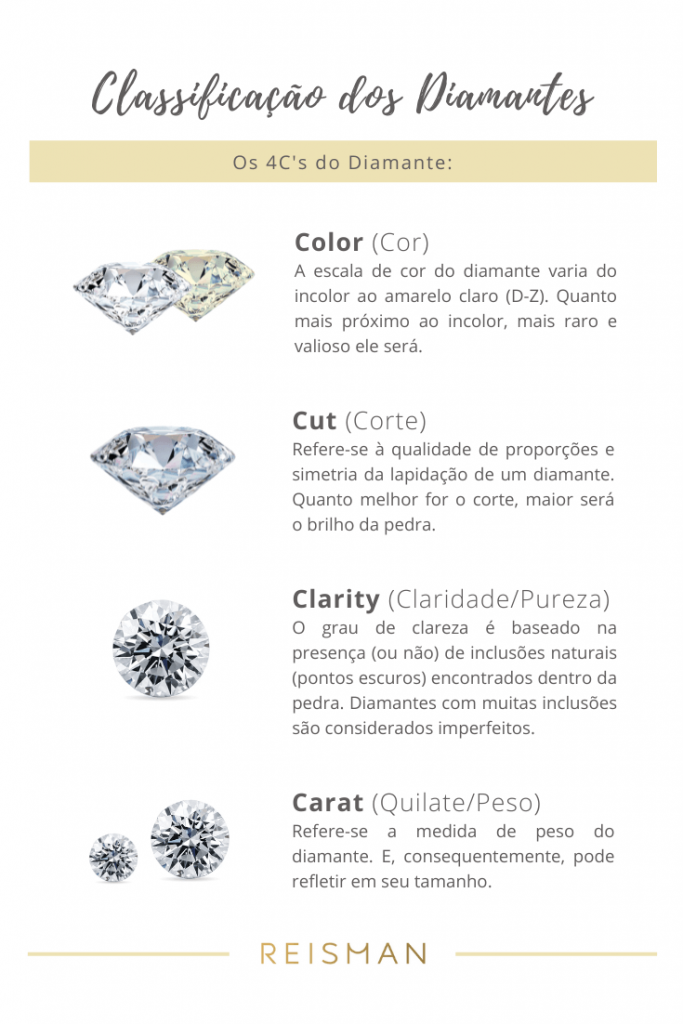

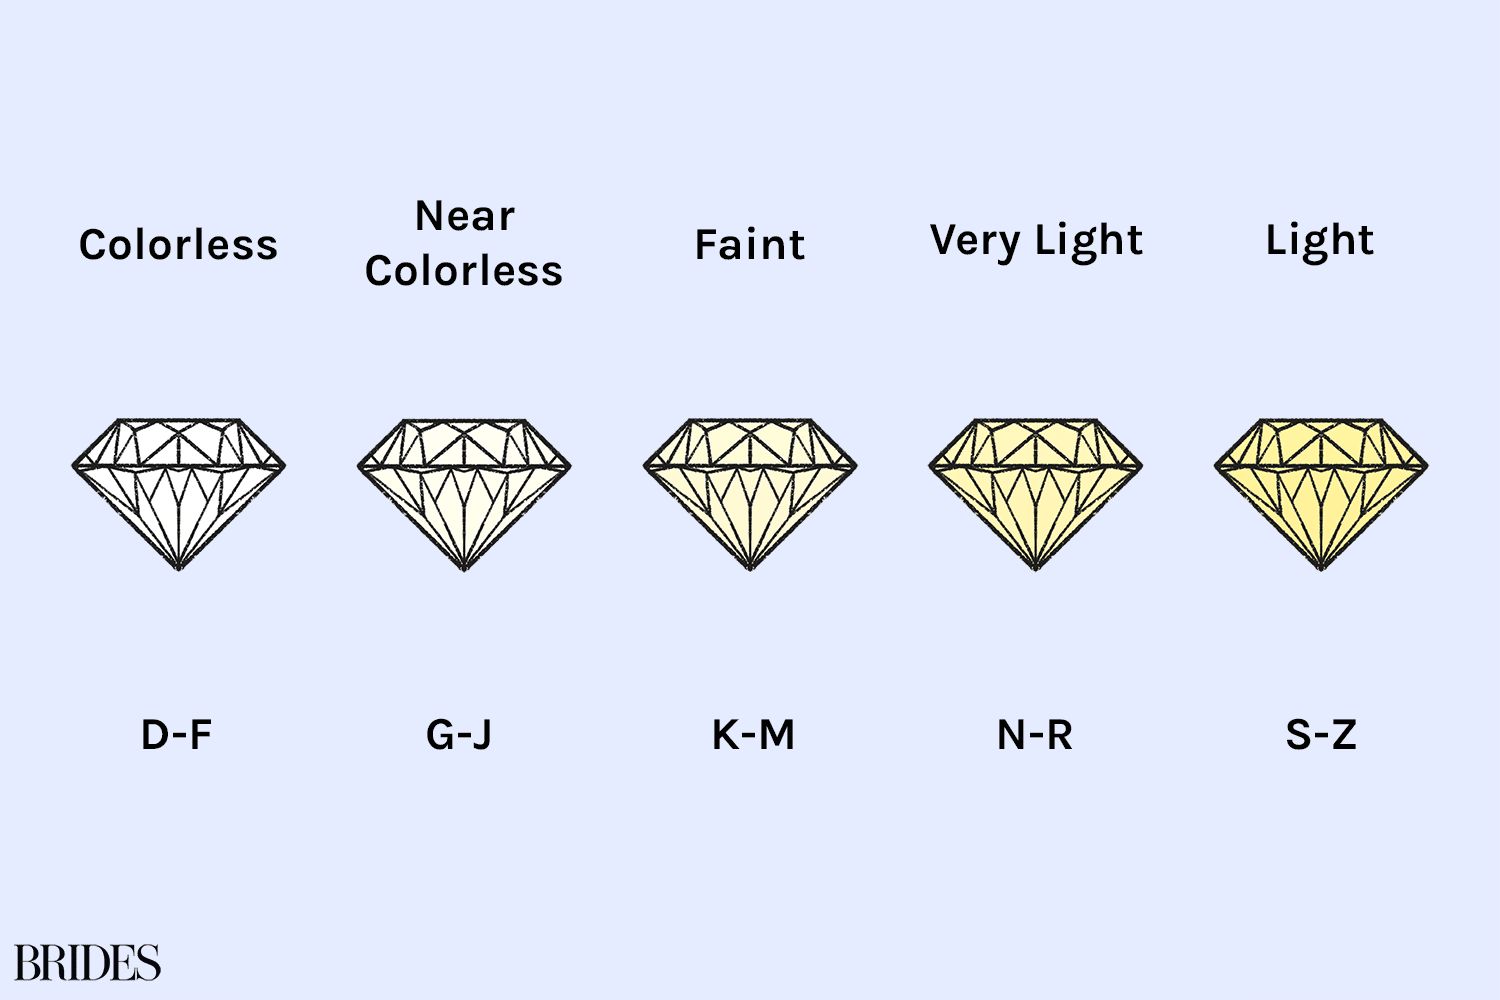

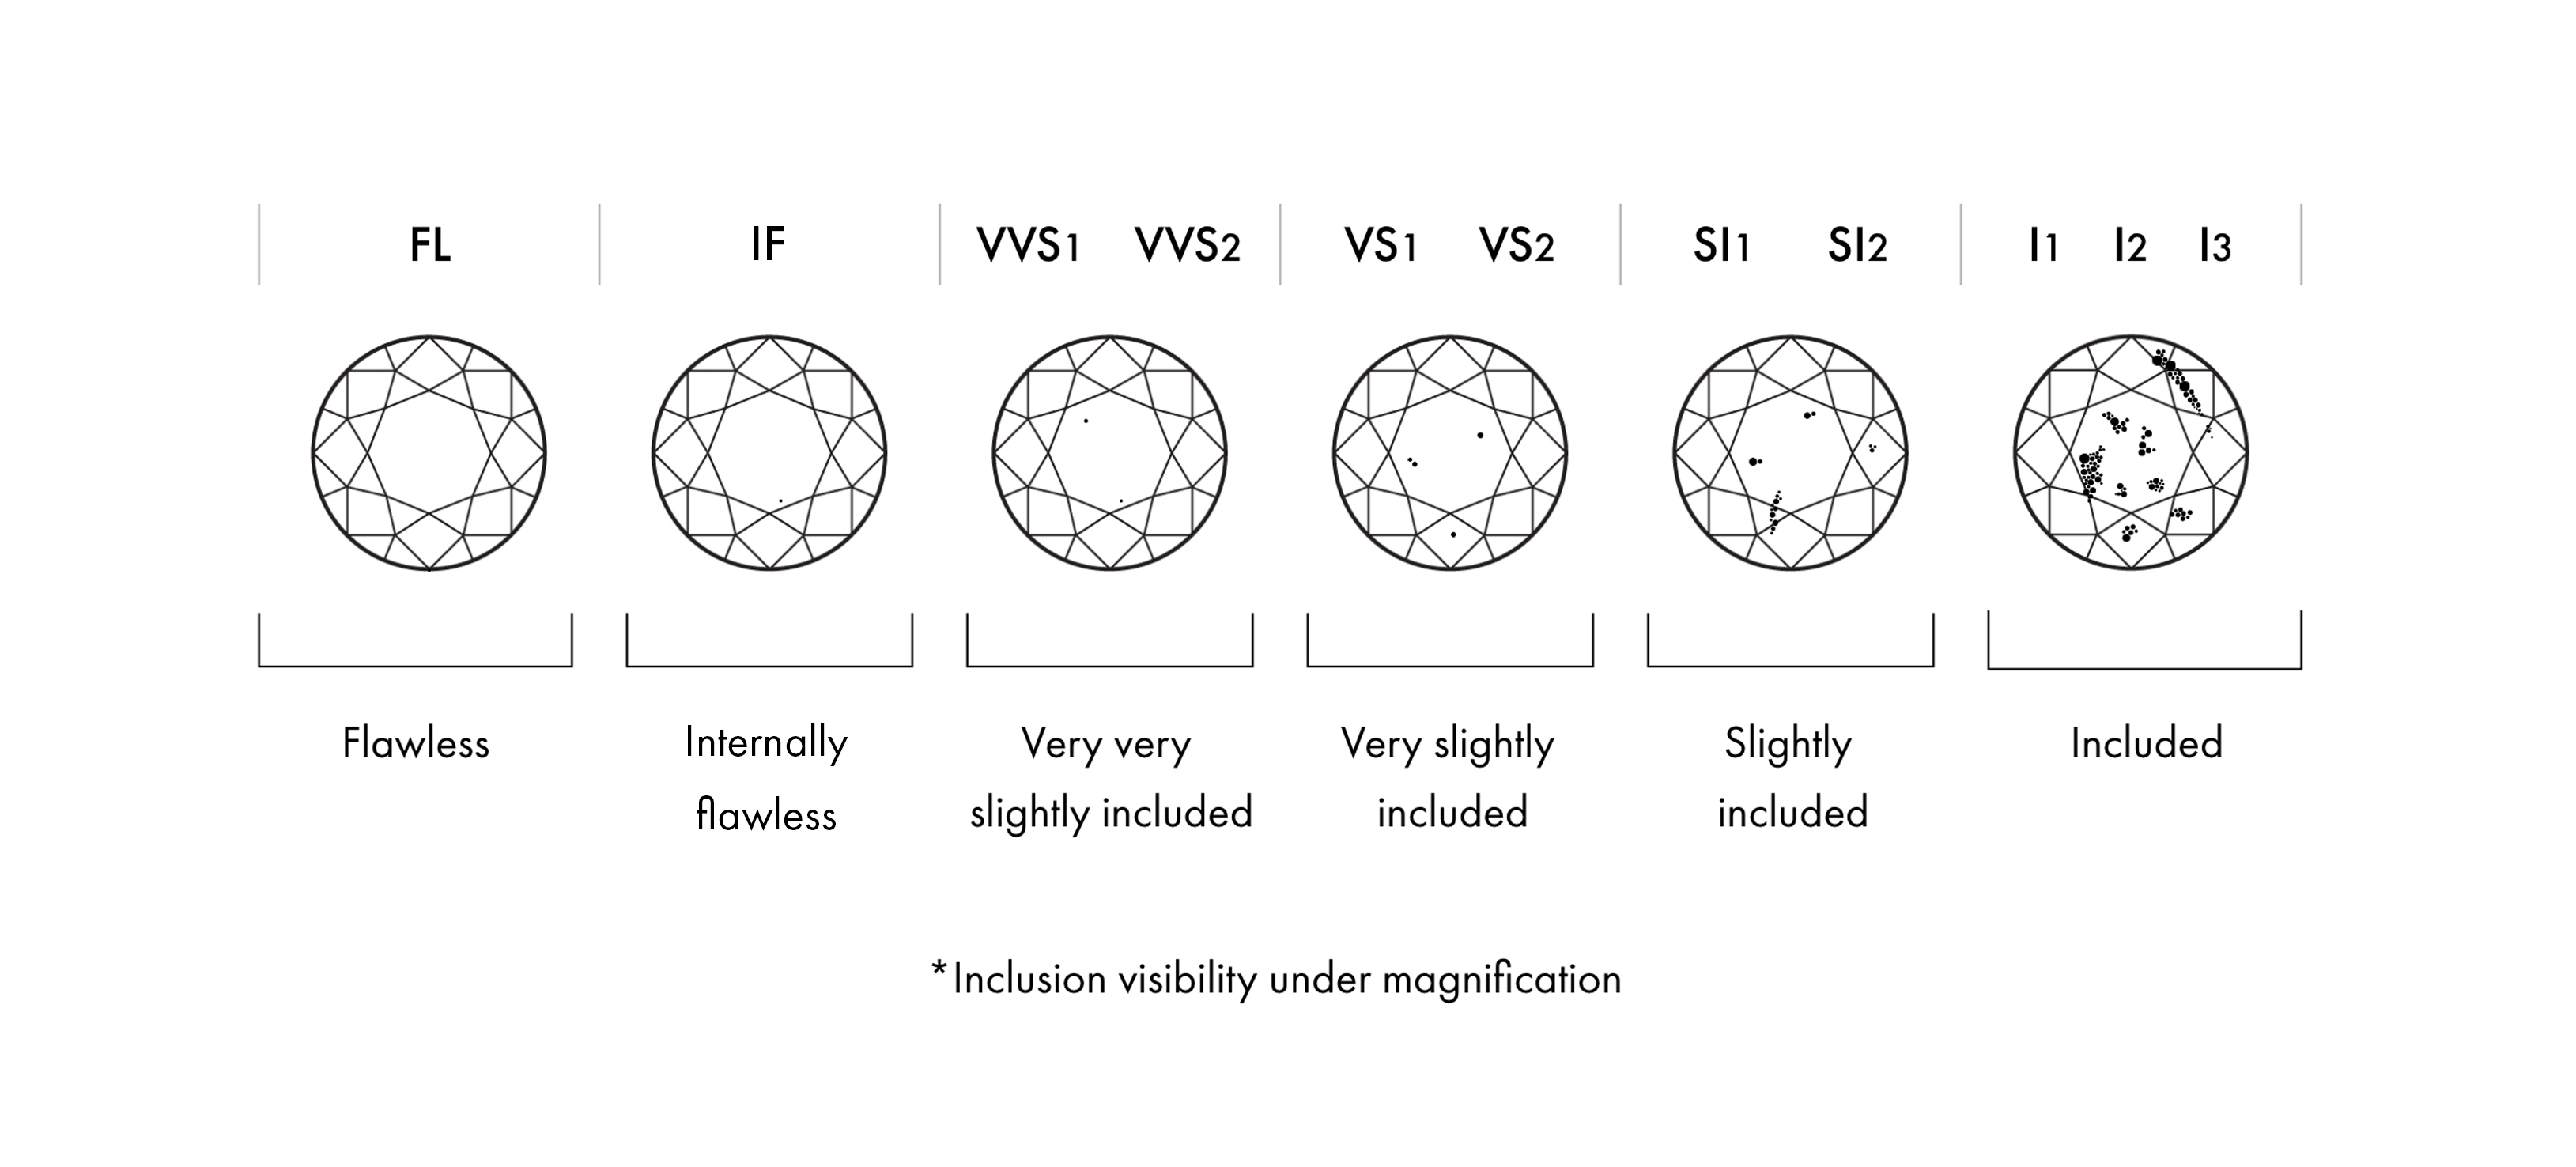

### 1\. Preços `outliers` de diamante

In [ ]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


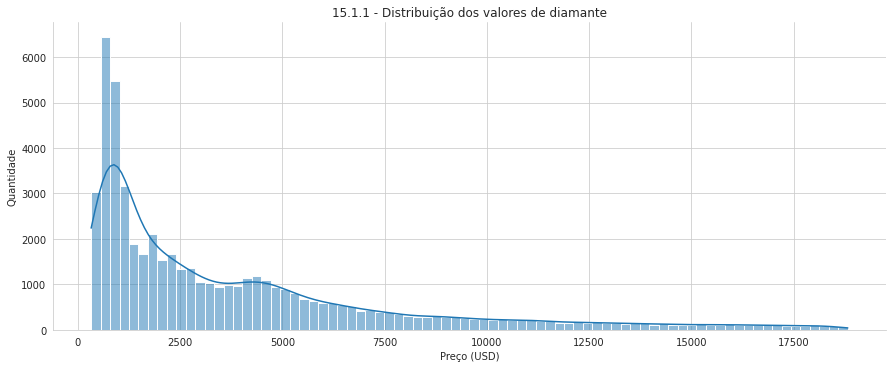

In [ ]:
# gráfico do exercício 1


with sns.axes_style('whitegrid'):
    grafico1 = sns.FacetGrid(data=data, height = 5, aspect = 2.5)
    grafico1.map(sns.histplot, 'price', kde=True)
    grafico1.set(title= '15.1.1 - Distribuição dos valores de diamante',xlabel='Preço (USD)', ylabel='Quantidade')

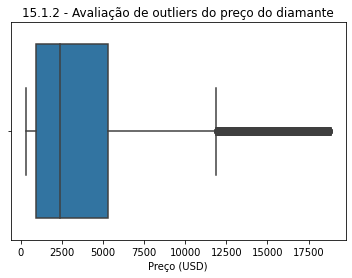

In [ ]:
grafico2 = sns.boxplot(x=data['price'])
grafico2.set(title='15.1.2 - Avaliação de outliers do preço do diamante', xlabel='Preço (USD)')
grafico2

In [ ]:
diamonds =data.query('price>12000')

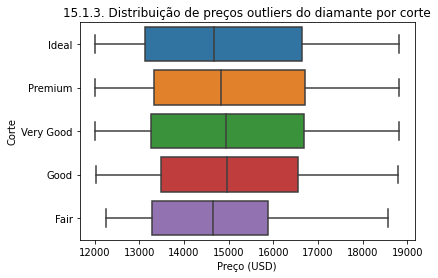

In [ ]:
grafico3 = sns.boxplot(x=diamonds['price'], y=diamonds['cut'])
grafico3.set(title='15.1.3. Distribuição de preços outliers do diamante por corte', xlabel='Preço (USD)', ylabel='Corte')
grafico3

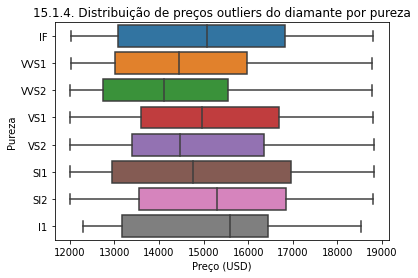

In [ ]:
grafico4 = sns.boxplot(x=diamonds['price'], y=diamonds['clarity'])
grafico4.set(title='15.1.4. Distribuição de preços outliers do diamante por pureza', xlabel='Preço (USD)', ylabel='Pureza')
grafico4

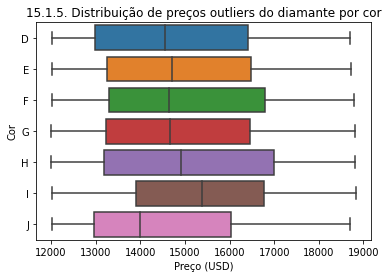

In [ ]:
grafico5 = sns.boxplot(x=diamonds['price'], y=diamonds['color'])
grafico5.set(title='15.1.5. Distribuição de preços outliers do diamante por cor', xlabel='Preço (USD)', ylabel='Cor')
grafico5

**Insight do gráfico 1**: 
Avaliando a distribuição de preços do diamante em USD através do Gráfico 15.1.1 - Distribuição dos valores de diamante, observou-se uma grande concentração de preços abaixo dos USD 1.000,00. A distribuição total varia entre 326 e 18.823,00 dólares.

Ao utilizar o gráfico Boxplot, calculou-se em "15.1.2 - Avaliação de outliers do preço do diamante" que estão fora do 'bigode' do gráfico (outliers) os preços acima de cerca de 12.000 dólares.

Com esse recorte de valores e aplicando novamente o Boxplot, segregou-se os valores pelas categorias corte, pureza e cor (respectivamente Gráficos 15.1.3, 15.1.4 e 15.1.5). Em nenhum deles foi notada a presença de outliers, denotando a distribuição próxima ao uniforme.

No recorte por corte (15.1.3) nota-se pouca diferença entre os valores.

Já comparando as categorias de pureza (15.1.4), há a surpresa de o tipo I2 (que é considerado o pior) ter os melhores valores, enquanto o VVS1 e VVS2, que estão entre os 3 melhores avaliados no escopo geral, são os dois de menores conjunto de preços.

Com relação às cores (15.1.5) também há surpresas, pois esperava-se que as cores de maior ausência de cor (D, E e F) tivessem melhores preços que os mais amarelados (I e J).


---

### 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("diamonds")
data.head(25)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


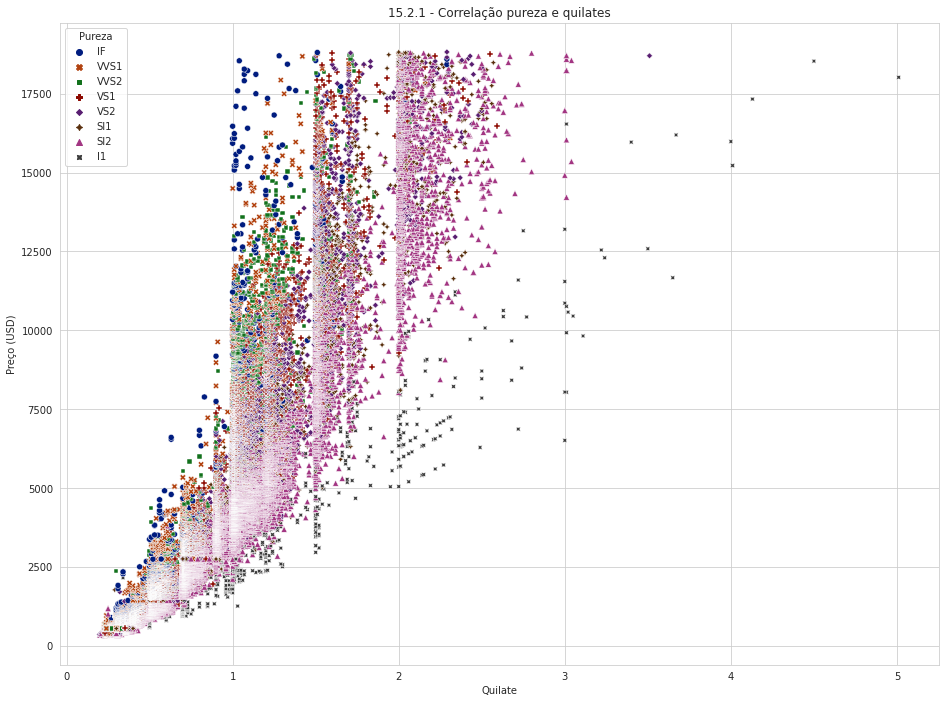

In [ ]:
# gráfico do exercício 2
with sns.axes_style('whitegrid'):
    grafico = sns.scatterplot(data=data, x='carat', y='price', hue = 'clarity', style = 'clarity', palette='dark') #style muda o formato dospontos
    grafico.set(title='15.2.1 - Correlação pureza e quilates', xlabel = 'Quilate', ylabel = 'Preço (USD)')
    grafico.get_legend().set_title('Pureza')
    grafico.figure.set_size_inches(w=40/2.54, h=30/2.54)

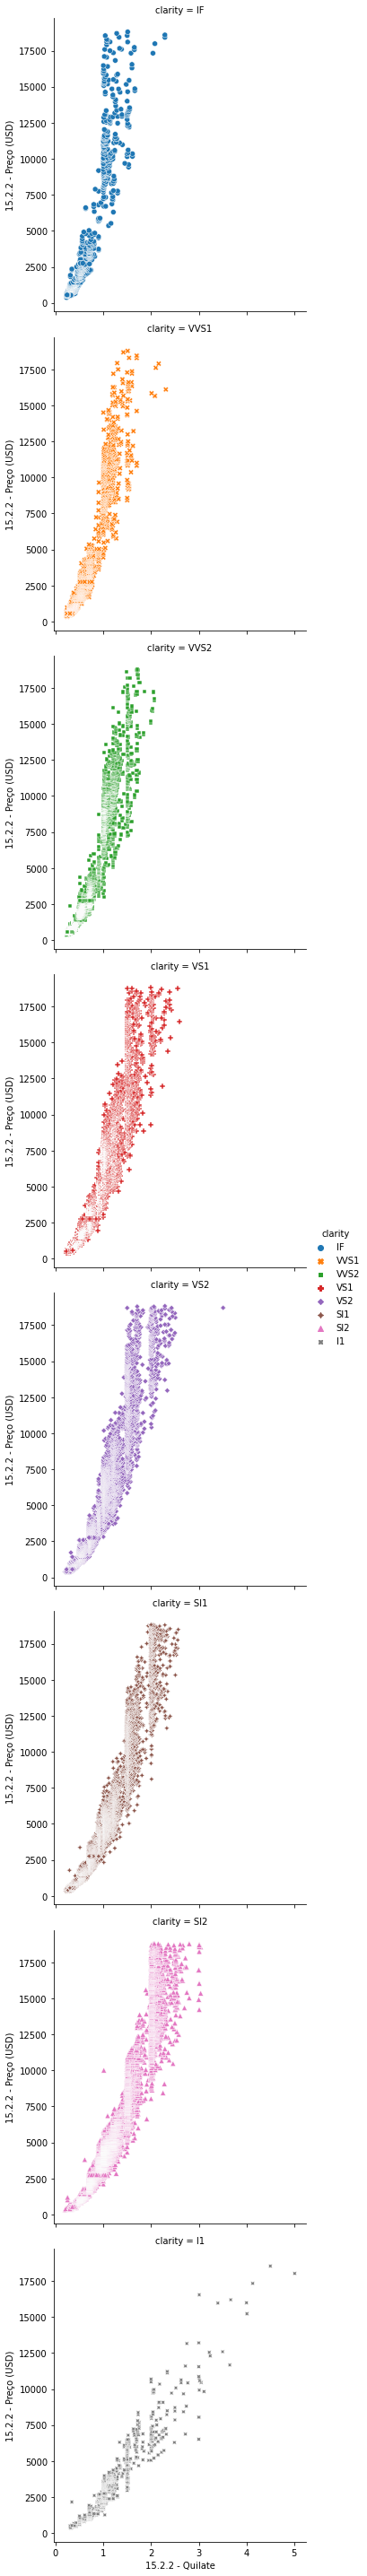

In [ ]:
grafico = sns.relplot(
    data=data, x='carat', y='price',
    row='clarity', hue = 'clarity', style='clarity',
    kind = 'scatter'
)
grafico.set(xlabel = '15.2.2 - Quilate', ylabel = '15.2.2 - Preço (USD)')


In [ ]:
diamonds = data[['clarity','carat','price']].groupby('clarity').agg('mean')
diamonds

,carat,price
clarity,,
IF,0.505123,2864.839106
VVS1,0.503321,2523.114637
VVS2,0.596202,3283.737071
VS1,0.727158,3839.455391
VS2,0.763935,3924.989395
SI1,0.850482,3996.001148
SI2,1.077648,5063.028606
I1,1.283846,3924.168691


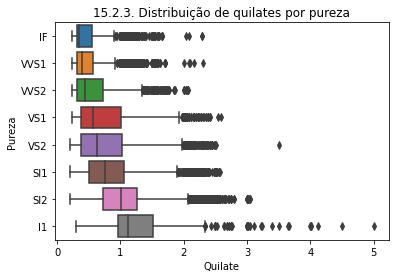

In [ ]:
grafico = sns.boxplot(x=data['carat'], y=data['clarity'])
grafico.set(title='15.2.3. Distribuição de quilates por pureza', xlabel='Quilate', ylabel='Pureza')
grafico

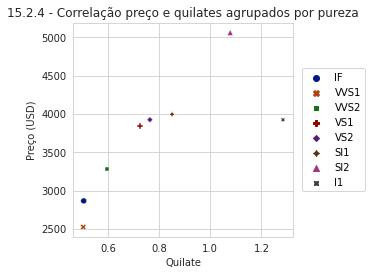

In [ ]:
with sns.axes_style('whitegrid'):
    grafico = sns.scatterplot(data=diamonds, x='carat', y='price', hue = 'clarity', style = 'clarity', palette='dark') #style muda o formato dospontos
    grafico.set(title='15.2.4 - Correlação preço e quilates agrupados por pureza', xlabel = 'Quilate', ylabel = 'Preço (USD)')
    grafico.get_legend().set_title('Pureza')
    grafico.figure.set_size_inches(w=10/2.54, h=10/2.54)
plt.legend(loc='right', bbox_to_anchor=(1.35,0.5))

**Insight do gráfico 2**:

O gráfico "15.2.1 - Correlação pureza e quilates" primeiramente mostra a concentração de valores em valores múltiplos de 0,25 quilates no intervalo de 0,2 e 1,5.

Também identifica-se (evidenciado no gráfico "15.2.2" e "15.2.3") que as melhores purezas (IF, VVS1 e VVS2) se concentram em valores de quilates abaixo de 1. Por outro lado, a pureza I1 (e uma única ocorrência de VS2) se extende a valores de quilates acima de 3. As demais classificações se distribuem de forma parecida entre 0,2 e 3 quilates.

Conclui-se portanto, que o preço tem correlação mais forte (diretamente proporcional) ao quilate do que à pureza do diamante. Ou seja, diamantes com menor pureza mas maior quilate (ex: I1 e SI2 no gráfico "15.2.4") possui maior preço médio que os de maior pureza e menor quilate (ex: IF e VVS1 no gráfico "15.2.4"). 

---

### 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [ ]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


[Text(0, 0.5, 'Quantidade'),
 Text(0.5, 0, 'Peso (libras)'),
 Text(0.5, 1.0, '15.3.1 - Distribuição de peso do carro')]

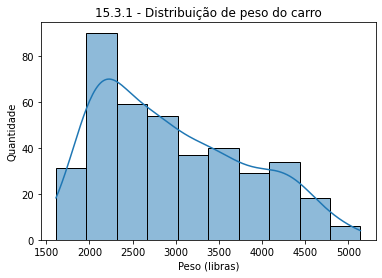

In [ ]:
# gráfico do exercício 3

cars = sns.histplot(data=data, x='weight', kde=True)
cars.set(title='15.3.1 - Distribuição de peso do carro', xlabel = 'Peso (libras)', ylabel='Quantidade')


Text(0.5, 1.0, '15.3.2 - Correlação entre as características do carro')

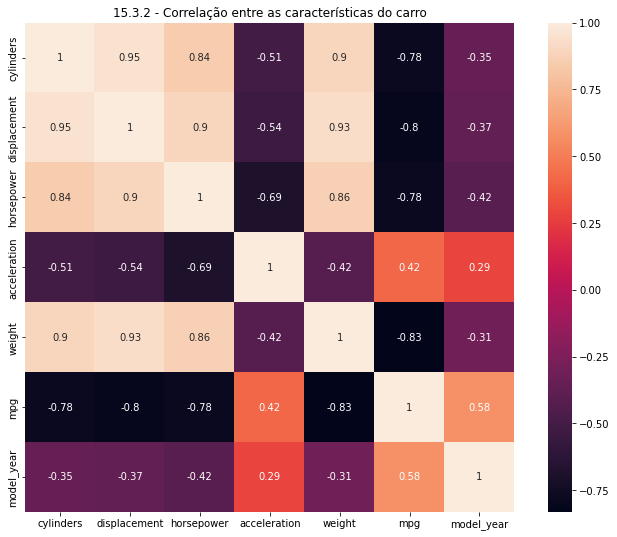

In [ ]:
# estabelece correlação entre as colunas do gráfico
fatores =['cylinders', 'displacement','horsepower','acceleration','weight','mpg','model_year']
corrmat = data[fatores].corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=True, annot=True)
ax.set_title('15.3.2 - Correlação entre as características do carro')

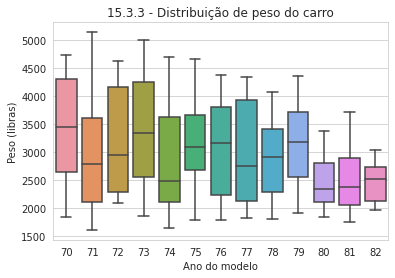

In [ ]:
with sns.axes_style('whitegrid'):
    cars2 = sns.boxplot(y=data['weight'], x=data['model_year'])
    cars2.set(title='15.3.3 - Distribuição de peso do carro', xlabel = 'Ano do modelo', ylabel='Peso (libras)')


[Text(0, 0.5, 'Peso (libra)'),
 Text(0.5, 0, 'Aceleração'),
 Text(0.5, 1.0, '15.3.4 - Peso do carro por aceleração')]

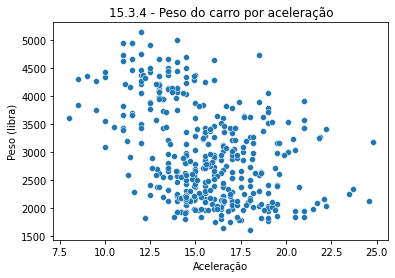

In [ ]:
aceleracao = sns.scatterplot(data=data, x='acceleration', y='weight')
aceleracao.set(title='15.3.4 - Peso do carro por aceleração', xlabel='Aceleração', ylabel='Peso (libra)')


[Text(0, 0.5, 'Peso (libra)'),
 Text(0.5, 0, 'Cilindrada'),
 Text(0.5, 1.0, '15.3.5 - Peso do carro por aceleração')]

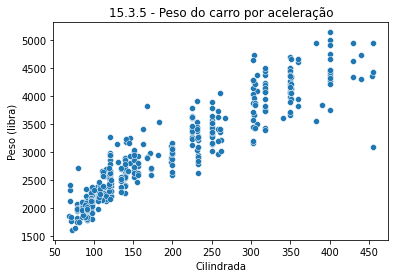

In [ ]:
aceleracao = sns.scatterplot(data=data, x='displacement', y='weight')
aceleracao.set(title='15.3.5 - Peso do carro por aceleração', xlabel='Cilindrada', ylabel='Peso (libra)')

[Text(0, 0.5, 'Peso (libra)'),
 Text(0.5, 0, 'Miles per gallon'),
 Text(0.5, 1.0, '15.3.6 - Peso do carro por MPG')]

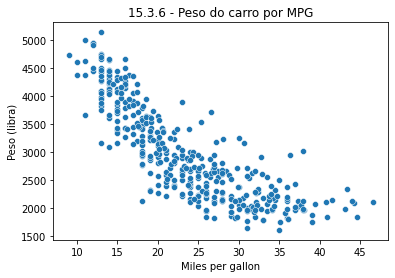

In [ ]:
aceleracao = sns.scatterplot(data=data, x='mpg', y='weight')
aceleracao.set(title='15.3.6 - Peso do carro por MPG', xlabel='Miles per gallon', ylabel='Peso (libra)')

**Insight do gráfico 3**: 

A distribuição de valores de peso dos carros valiados variam entre 1500 e 5000 libras, mas a moda (onde se concentra a maioria) é na faixa de 2000 a 2250 libras, como se observa no gráfico "15.3.1 - Distribuição de peso do carro".

Já no gráfico "15.3.2 - Correlação entre as características do carro" O peso do carro influencia bastante nas demais variáveis analisadas. O tempo de aceleração é inversamente proporcional ao peso, ou seja, diminui a eficiência. O carro mais pesado também tem menor eficiência MPG (miles per gallon), conforme gráfico "15.3.6 - Peso do carro por MGP". Mas nesses dois casos, a correlação não é tão forte, como mostra o gráfico "15.3.4 - Peso do carro por aceleração".

Quanto ao ano de lançamento do modelo, quanto mais recente, mais leve tende a ser o carro (gráfico "15.3.3 - Distribuição de peso do carro").

Já se relaciona diretamente proporcional aos demais dados avaliados relativos à tecnologia (cilindros, cilindrada, cavalos de potência), pois entnede-se que esses componentes contribuem diretamente no aumento do peso. (Gráfico "15.3.5 - Peso do carro por aceleração").

---